In [1]:
import pandas as pd 
listings = pd.read_csv("Listings.csv",encoding="ISO-8859-1",low_memory=False,parse_dates=["host_since"])
listings.head()


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [2]:
listings["host_since"]=pd.to_datetime(listings["host_since"])
listings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [3]:
paris_listings =listings.query("city =='Paris'").loc[: ,["host_since","neighbourhood","city","accommodates","price"]]
paris_listings.info()


<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [4]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [5]:
paris_listings.describe()



,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [7]:
paris_listings.query("price ==0 and accommodates ==0").count()


host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [8]:
##Visualization

In [9]:
paris_listings_accommodates=(
    paris_listings.query("neighbourhood=='Elysee'").groupby("accommodates").agg({"price":"mean"}).sort_values("price"))

paris_listings_accommodates.tail()


,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [10]:
paris_listings_over_time=(
    paris_listings.set_index("host_since")
    .resample('Y')
    .agg({"neighbourhood":"count",
          "price":"mean"})
        
)
paris_listings_over_time.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6892\2667622056.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample('Y')


,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


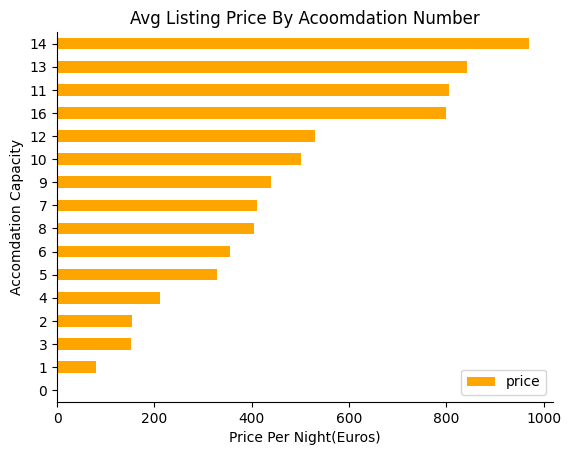

In [22]:
import seaborn as sns
import matplotlib.pyplot as mlt
(paris_listings_accommodates
 .plot
 .barh(
     title="Avg Listing Price By Acoomdation Number",
     color="orange",
     xlabel="Price Per Night(Euros)",
     ylabel="Accomdation Capacity",
    
     
 )
)
sns.despine()


<Axes: title={'center': 'New AirBnb Hosts'}, xlabel='host Since', ylabel='New Hosts'>

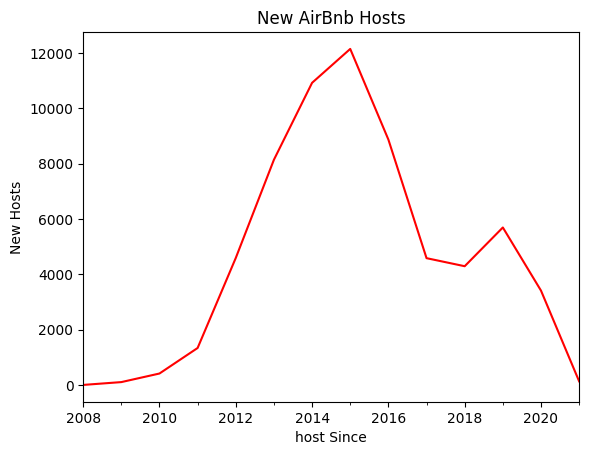

In [27]:
paris_listings_over_time["neighbourhood"].plot(
    title="New AirBnb Hosts",
    color="red",
    xlabel="host Since",
    ylabel="New Hosts"
)

<Axes: title={'center': 'New AirBnb Hosts'}, xlabel='host Since', ylabel='New Hosts'>

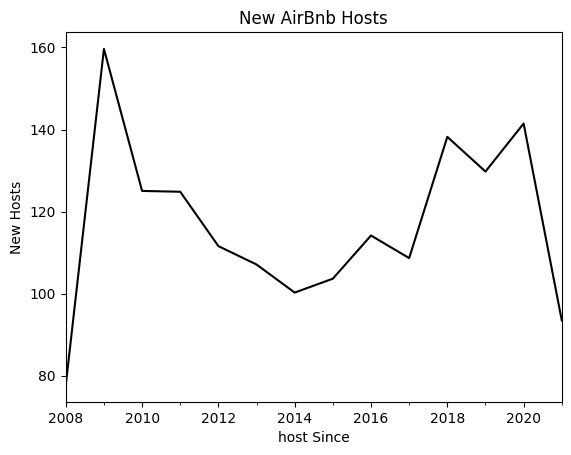

In [32]:
paris_listings_over_time["price"].plot(
    title="New AirBnb Hosts",
    color="black",
    xlabel="host Since",
    ylabel="New Hosts"
)

Text(0, 0.5, 'Average price')

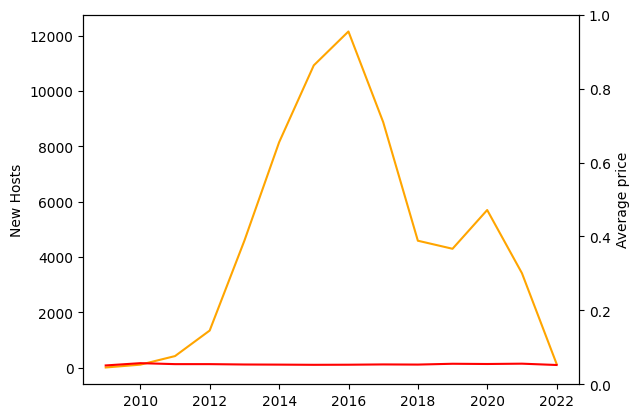

In [49]:
import matplotlib.pyplot as plt 
fig, ax=plt.subplots()
ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    color="Orange",
)
ax.set_ylabel("New Hosts")
ax2=ax.twinx()
ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="price",
    color="red")
ax2.set_xlim()
ax2.set_ylabel("Average price")
